<a href="https://colab.research.google.com/github/2303A52097/Generative_AI_2025/blob/main/2303A52097_Week08_Assignment_8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment-8.3

Epoch 1/260


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5220 - loss: 0.6972 - val_accuracy: 0.5859 - val_loss: 0.6806
Epoch 2/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5211 - loss: 0.6896 - val_accuracy: 0.5859 - val_loss: 0.6797
Epoch 3/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5336 - loss: 0.6855 - val_accuracy: 0.5859 - val_loss: 0.6784
Epoch 4/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5669 - loss: 0.6851 - val_accuracy: 0.5859 - val_loss: 0.6720
Epoch 5/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5530 - loss: 0.6819 - val_accuracy: 0.5859 - val_loss: 0.6669
Epoch 6/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5496 - loss: 0.6731 - val_accuracy: 0.7109 - val_loss: 0.6653
Epoch 7/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6382 - loss: 0.6687 - val_accuracy: 0.7344 - val_loss: 0.6606
Epoch 8/260
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7070 - loss: 0.6640 - val_accuracy: 0.7188 - val_loss: 0.

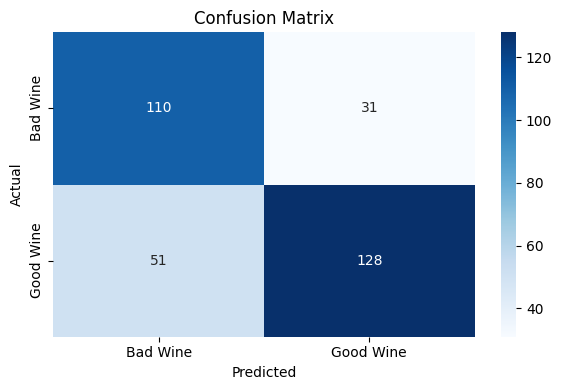

Classification Report:
               precision    recall  f1-score   support

    Bad Wine       0.68      0.78      0.73       141
   Good Wine       0.81      0.72      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.75      0.74      0.74       320

Model saved as wine_quality_ann_model.h5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Loaded Model Test Accuracy: 0.74375


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
df = pd.read_csv("/content/winequality-red (3).csv")
X = df.drop("quality", axis=1)
y = df["quality"]
y = (y >= 6).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential([
    Dense(16, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(24, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=260, batch_size=64, validation_split=0.1)
y_pred = (model.predict(X_test) > 0.5).astype(int)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_acc)
train_pred = (model.predict(X_train) > 0.5).astype(int)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Bad Wine", "Good Wine"],
            yticklabels=["Bad Wine", "Good Wine"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
report = classification_report(y_test, y_pred, target_names=["Bad Wine", "Good Wine"])
print("Classification Report:\n", report)
model.save("wine_quality_ann_model.h5")
print("Model saved as wine_quality_ann_model.h5")
loaded_model = load_model("wine_quality_ann_model.h5")
loaded_pred = (loaded_model.predict(X_test) > 0.5).astype(int)
loaded_acc = accuracy_score(y_test, loaded_pred)
print("Loaded Model Test Accuracy:", loaded_acc)
